# Import data dan Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.utils import resample

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Tambahkan nama header kolom
header_kolom = ['Number of Instances', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
              'Total phenols', 'Flavanoids', 'Non Flavanoids phenols', 'Proanthocyanins',
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

#Memuat dataframe dangan header kolom
df = pd.read_csv('wine.data', header=None, names=header_kolom)

#Lihat 5 baris pertama dataframe
df.head()

,Number of Instances,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Non Flavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#cek jumlah baris dan kolom dari dataframe
print(df.shape)

(178, 14)


In [ ]:
#Lihat statistik dataframe
df.describe()

,Number of Instances,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Non Flavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Memisahkan Kolom target dengan kolom feature

In [ ]:
#Pisah Feature dan Target
X = df.drop(columns='Number of Instances', axis=1)
Y = df['Number of Instances']

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# Decession tree tanpa pre-procesing

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Mengukur akurasi model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menampilkan skor pelatihan
print("Skor Pelatihan:", clf.score(X_train, y_train))
print("Skor Uji:", clf.score(X_test, y_test))

Akurasi: 0.9651162790697675
Skor Pelatihan: 1.0
Skor Uji: 0.9651162790697675


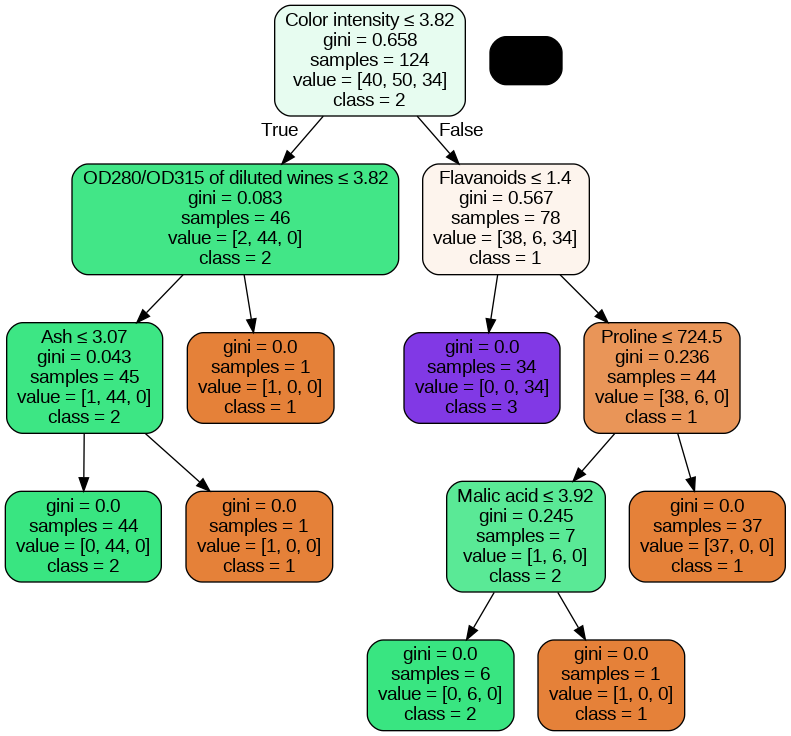

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
              'Total phenols', 'Flavanoids', 'Non Flavanoids phenols', 'Proanthocyanins',
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
dot_data = StringIO()
dot_data = export_graphviz(clf, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True,
                           feature_names=feature_names,
                           class_names=[str(i) for i in clf.classes_])

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('wine.png')  # Save the image to a file
Image(graph.create_png())

# Pre-procesing

**Pemilihan FItur/Atribut penting**
 : Melihat fitur terpenting dari data yang paling berpengaruh pada kolom target (Number of Instances)

Fitur-Fitur Penting:
   Alcohol  Alcalinity of ash  Flavanoids  Color intensity  Proline
0    14.23               15.6        3.06             5.64     1065
1    13.20               11.2        2.76             4.38     1050
2    13.16               18.6        3.24             5.68     1185
3    14.37               16.8        3.49             7.80     1480
4    13.24               21.0        2.69             4.32      735


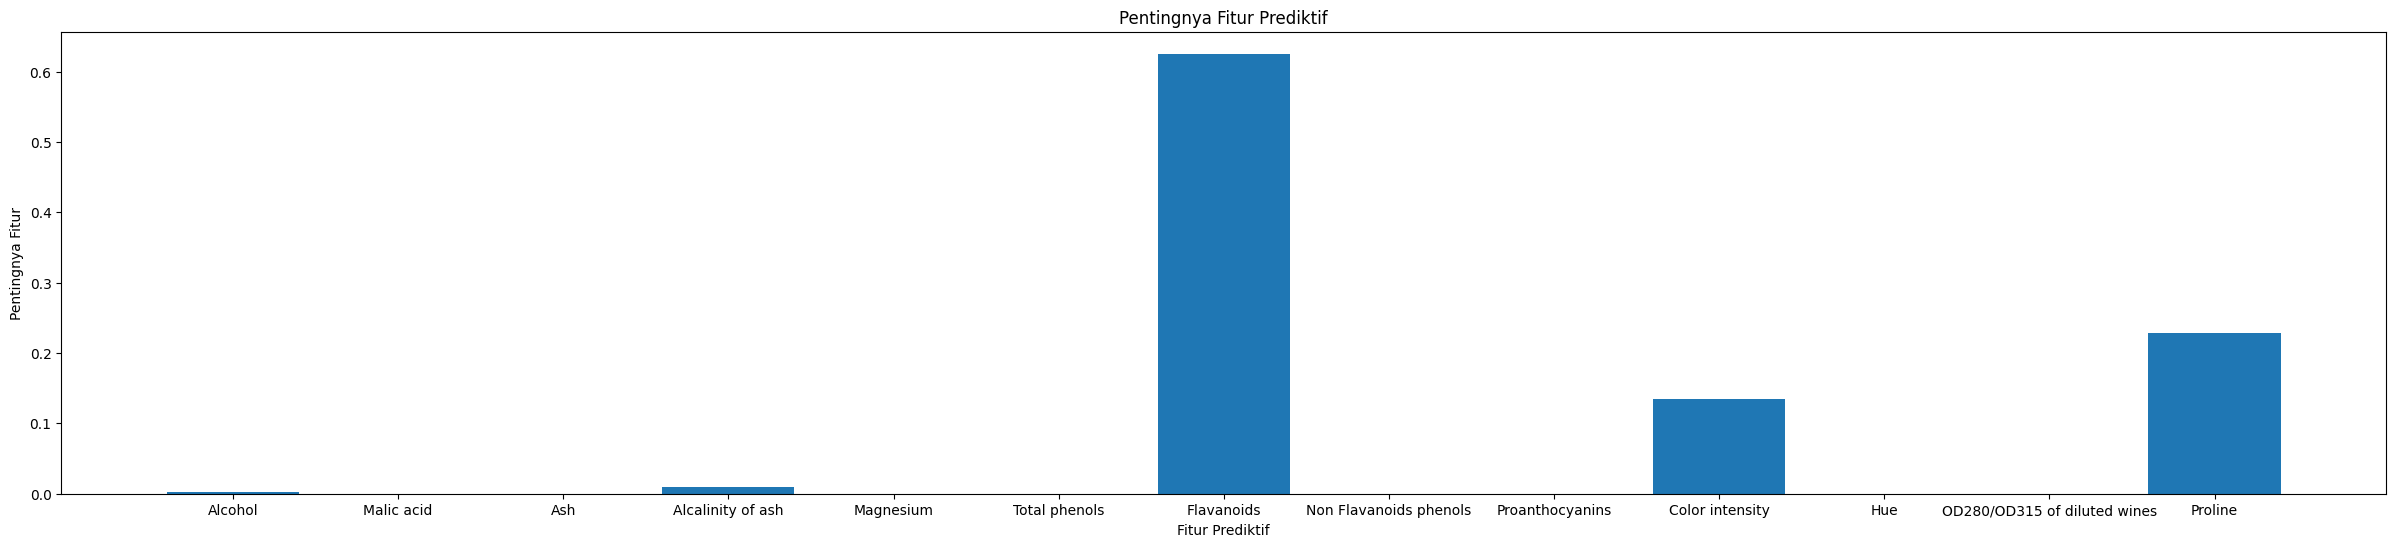

{'Alcohol': 0.0021772102353347367, 'Malic acid': 0.0, 'Ash': 0.0, 'Alcalinity of ash': 0.00921359825303914, 'Magnesium': 0.0, 'Total phenols': 0.0, 'Flavanoids': 0.6253761775523382, 'Non Flavanoids phenols': 0.0, 'Proanthocyanins': 0.0, 'Color intensity': 0.13497952400374624, 'Hue': 0.0, 'OD280/OD315 of diluted wines': 0.0, 'Proline': 0.22825348995554154}


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Inisialisasi model pohon keputusan
model = DecisionTreeRegressor()

# Latih model pada data
model.fit(X, Y)

# Dapatkan pentingnya fitur (feature importance) dari model
feature_importance = model.feature_importances_

# Tentukan ambang batas (threshold) untuk kepentingan fitur
threshold = 0.001  # Ganti dengan ambang batas yang sesuai

# Filter fitur-fitur yang penting berdasarkan ambang batas
important_features = X.columns[feature_importance >= threshold]

# Buat DataFrame baru hanya dengan fitur-fitur penting
df_important = X[important_features]

# Tampilkan fitur-fitur penting
print("Fitur-Fitur Penting:")
print(df_important.head())

# Buat plot untuk menampilkan pentingnya fitur-fitur
plt.figure(figsize=(30, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Fitur Prediktif')
plt.ylabel('Pentingnya Fitur')
plt.title('Pentingnya Fitur Prediktif')
plt.show()

print(dict(zip(X.columns, feature_importance)))

**Penanganan Data Duplikat** : Memastikan bahwa data dalam dataframe tidak ada yang terduplikat

In [ ]:
# Menampilkan jumlah baris sebelum menghapus data duplikat
print(f"Jumlah baris sebelum menghapus data duplikat: {len(df_important)}")

# Mendeteksi dan menghapus data duplikat
df_important.drop_duplicates(inplace=True)

# Menampilkan jumlah baris setelah menghapus data duplikat
print(f"Jumlah baris setelah menghapus data duplikat: {len(df)}")

print("\nDataFrame setelah proses Penanganan Data Duplikat:\n")

print (df_important)

Jumlah baris sebelum menghapus data duplikat: 178
Jumlah baris setelah menghapus data duplikat: 178

DataFrame setelah proses Penanganan Data Duplikat:

     Alcohol  Alcalinity of ash  Flavanoids  Color intensity  Proline
0      14.23               15.6        3.06             5.64     1065
1      13.20               11.2        2.76             4.38     1050
2      13.16               18.6        3.24             5.68     1185
3      14.37               16.8        3.49             7.80     1480
4      13.24               21.0        2.69             4.32      735
..       ...                ...         ...              ...      ...
173    13.71               20.5        0.61             7.70      740
174    13.40               23.0        0.75             7.30      750
175    13.27               20.0        0.69            10.20      835
176    13.17               20.0        0.68             9.30      840
177    14.13               24.5        0.76             9.20      560

[178 r

<ipython-input-12-f78fa22d7798>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important.drop_duplicates(inplace=True)


**Penanganan Data Hilang (missing value)** : Mengatasi nilai-nilai yang kosong atau hilang dalam dataframe

In [ ]:
#Cek missing value
missing_value_cek = df_important.isnull().sum()
missing_value_cek

Alcohol              0
Alcalinity of ash    0
Flavanoids           0
Color intensity      0
Proline              0
dtype: int64

**Standarisasi** : Mengubah skala atau rentang atribut dalam dataset
agar memiliki skala yang seragam

In [ ]:
#Standarisasi feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(df_important)

stardardized_data = pd.DataFrame(standardized, columns = important_features)
stardardized_data.head()

,Alcohol,Alcalinity of ash,Flavanoids,Color intensity,Proline
0,1.518613,-1.169593,1.034819,0.251717,1.013009
1,0.246290,-2.490847,0.733629,-0.293321,0.965242
2,0.196879,-0.268738,1.215533,0.269020,1.395148
3,1.691550,-0.809251,1.466525,1.186068,2.334574
4,0.295700,0.451946,0.663351,-0.319276,-0.037874


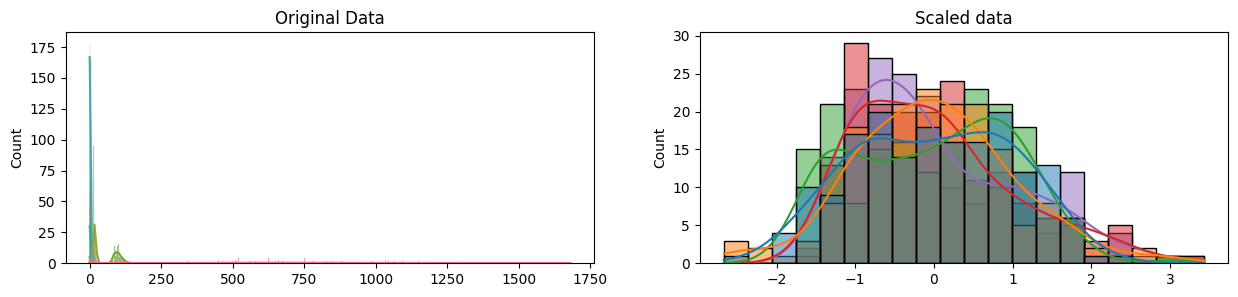

In [ ]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(X, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(stardardized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

**Reduksi dimensi data** : Mengurangi jumlah atribut dalam dataset sambil
mempertahankan informasi yang paling penting (Agar tidak terlalu banyak atribut)

In [ ]:
from sklearn.decomposition import PCA

n_components = 4  # Ganti dengan jumlah komponen yang diinginkan
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(stardardized_data)

X_pca = pd.DataFrame(X_pca, columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4'])
X_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4
0,2.316824,-0.400974,-0.141790,-0.164760
1,1.854769,-1.472240,-1.455159,0.229596
2,1.539692,-0.576019,0.692670,0.244207
3,3.463932,0.134619,0.617771,0.059631
4,0.105952,-0.328835,0.743143,-0.124476


**Resampling data kelas yang tidak seimbang** : mengatasi ketidakseimbangan kelas dengan menambahkan atau mengurangi sampel pada kelas minoritas atau mayoritas

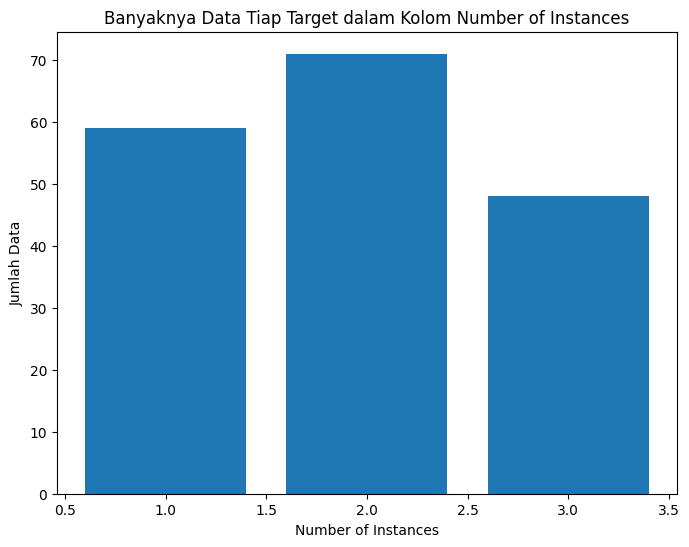

{1: 59, 2: 71, 3: 48}


In [ ]:
# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(Y, return_counts=True)

# Membuat plot batang untuk menampilkan banyaknya data untuk tiap target
plt.figure(figsize=(8, 6))
plt.bar(unique_targets, target_counts)
plt.xlabel('Number of Instances')
plt.ylabel('Jumlah Data')
plt.title('Banyaknya Data Tiap Target dalam Kolom Number of Instances')
plt.show()

unique_targets, target_counts = np.unique(Y, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

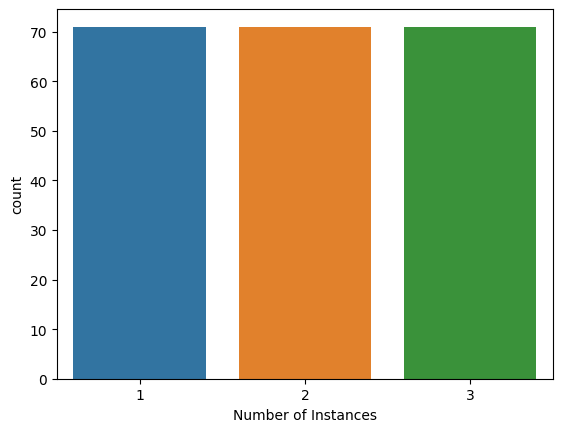

{1: 71, 2: 71, 3: 71}


In [ ]:
from imblearn.over_sampling import RandomOverSampler

resamp = RandomOverSampler()
balX, balY = resamp.fit_resample(X_pca, Y)

sns.countplot(x=balY)
plt.show()

unique_targets, target_counts = np.unique(balY, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

# Decession tree setelah proses pre-procesing

**Test ke-1 (80% training dan 20% test):**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balX, balY, test_size=0.2, random_state=42) # 80% training and 20% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Mengukur akurasi model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menampilkan skor pelatihan
print("Skor Pelatihan:", clf.score(X_train, y_train))
print("Skor Uji:", clf.score(X_test, y_test))

Akurasi: 0.9302325581395349
Skor Pelatihan: 1.0
Skor Uji: 0.9302325581395349


**Test ke-2 (70% training dan 30% test):**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balX, balY, test_size=0.3, random_state=42) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Mengukur akurasi model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menampilkan skor pelatihan
print("Skor Pelatihan:", clf.score(X_train, y_train))
print("Skor Uji:", clf.score(X_test, y_test))

Akurasi: 0.953125
Skor Pelatihan: 1.0
Skor Uji: 0.953125


**Test ke-3 (60% training dan 40% test):**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balX, balY, test_size=0.4, random_state=42) # 60% training and 40% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Mengukur akurasi model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menampilkan skor pelatihan
print("Skor Pelatihan:", clf.score(X_train, y_train))
print("Skor Uji:", clf.score(X_test, y_test))

Akurasi: 0.9534883720930233
Skor Pelatihan: 1.0
Skor Uji: 0.9534883720930233
